In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
dia_df = pd.read_csv("diabetes.csv")
dia_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
dia_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [3]:
dia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
dia_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
dia_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [16]:
dia_df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']] = dia_df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']].replace(0,np.nan)

In [17]:
dia_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
dia_df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

# Visualization

# Pairplot using Seaborn 

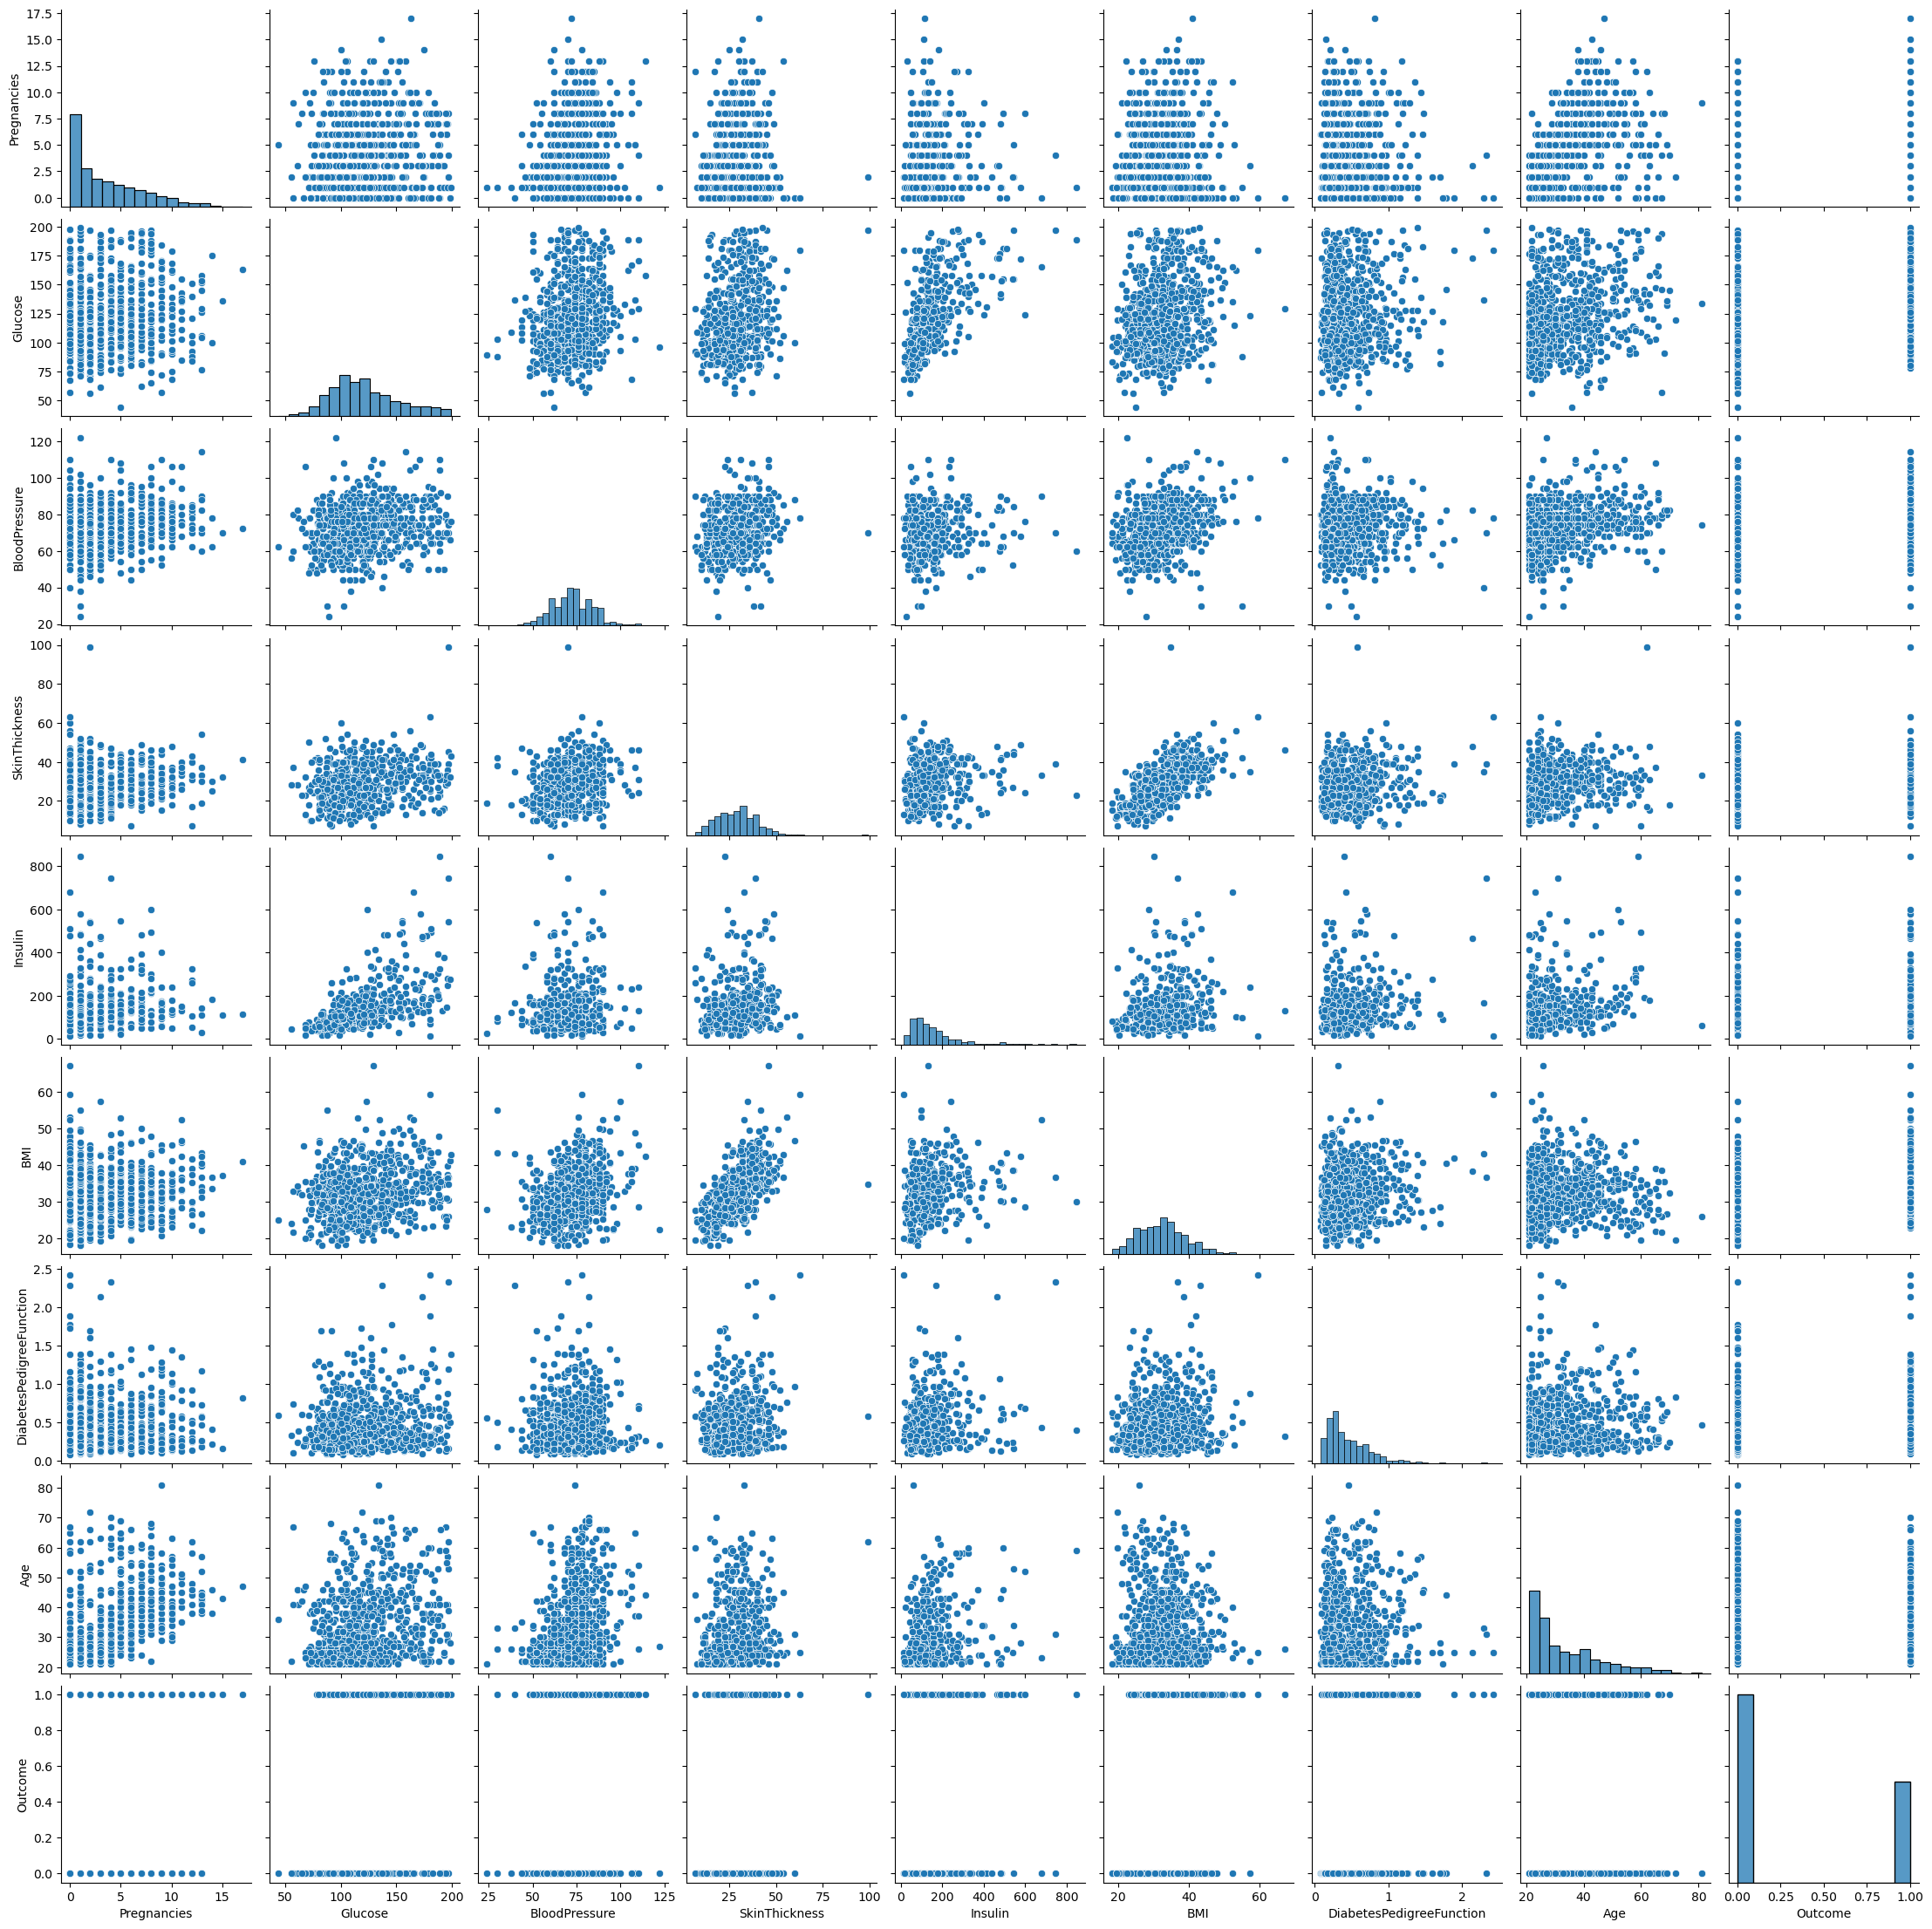

In [19]:
sns.pairplot(dia_df)

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

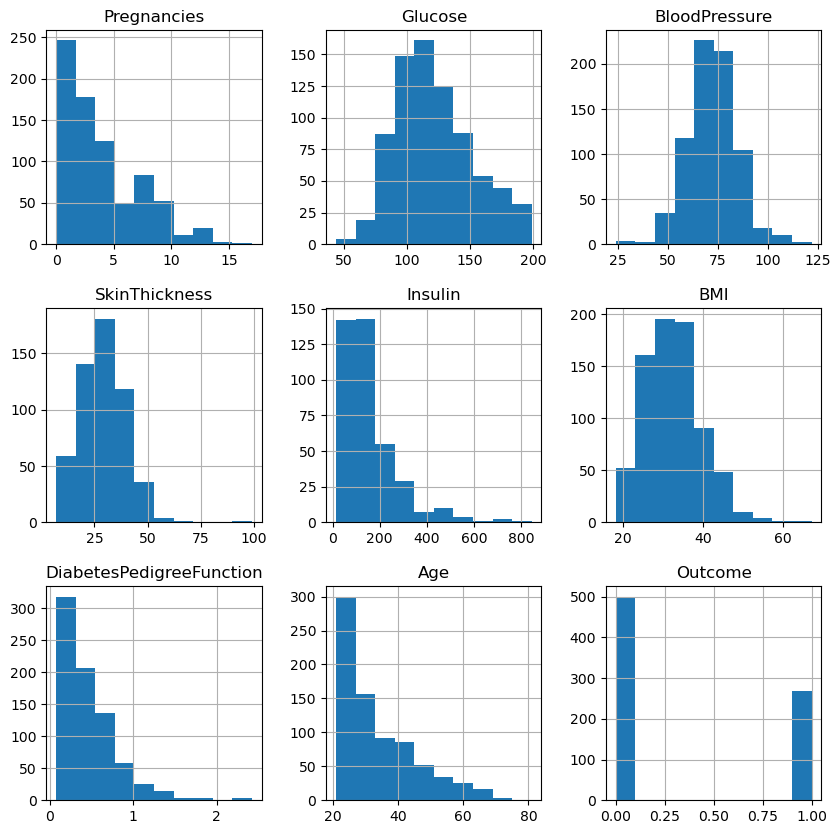

In [20]:
dia_df.hist(figsize=(10,10))

# Visualize Corelation between features using heatmap()

<Axes: >

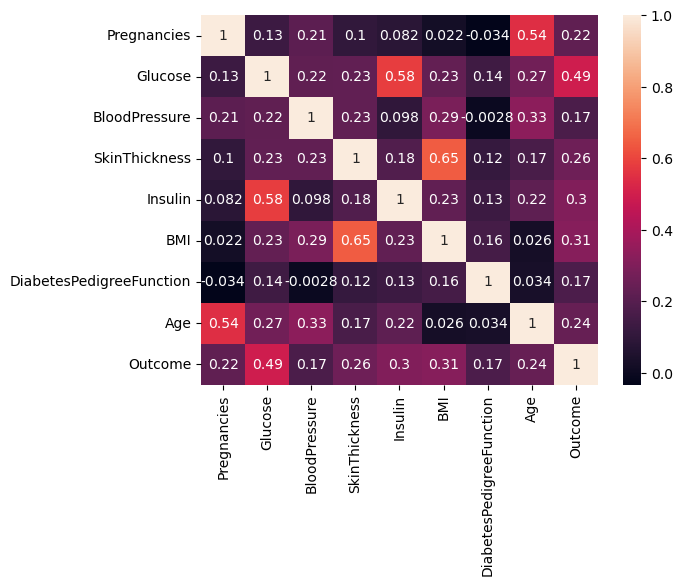

In [21]:
sns.heatmap(dia_df.corr(), annot=True)

In [11]:
dia_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Split Dataset in TRAIN AND TEST data

In [159]:
X = dia_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = dia_df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

# X_train and X_test has null values that need to be replaced using Forward/Backward fill or Interpollate or Mean or Median or Mode

In [160]:
X_train.isnull().sum()

Pregnancies                   0
Glucose                       1
BloodPressure                 9
SkinThickness               107
Insulin                     184
BMI                           1
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [161]:
X_test.isnull().sum()

Pregnancies                   0
Glucose                       4
BloodPressure                26
SkinThickness               120
Insulin                     190
BMI                          10
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

# since all the columns where null values are found are numeric (NOT Time Series), below graph will help us to understand whether to use mean or median or mode to fill

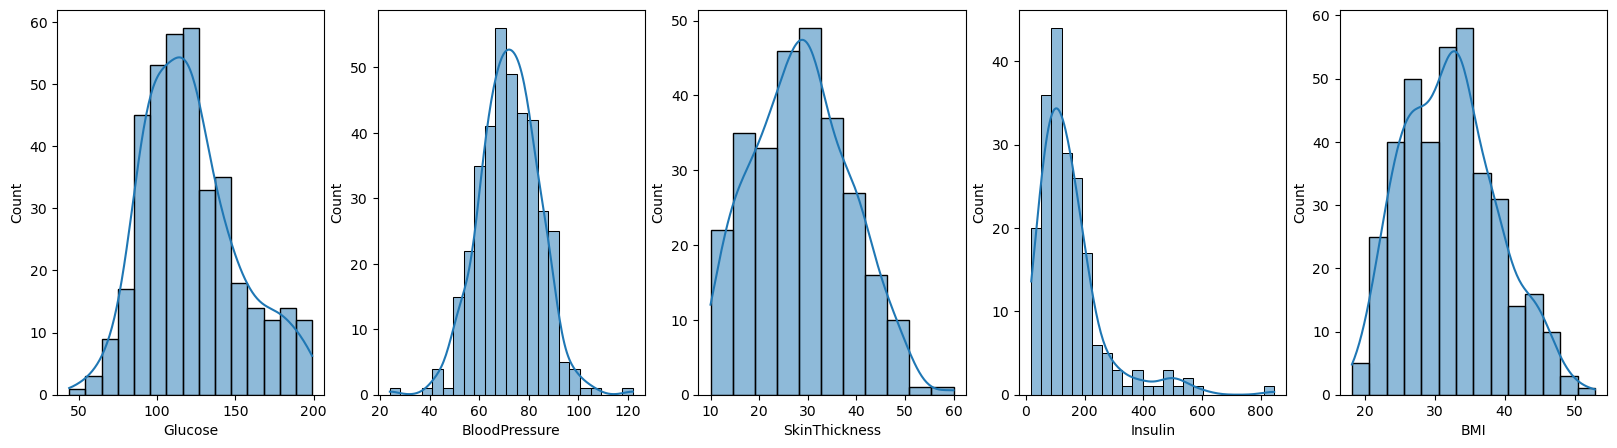

In [162]:
import matplotlib.pylab as plt
columns_with_nan=["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]

fig,ax=plt.subplots(nrows=1,ncols=5,figsize=(20,5))
for i in range(len(columns_with_nan)) : #range(5) = 0,1,2,3,4    
    sns.histplot(X_train[columns_with_nan[i]], ax=ax[i], kde=True)
plt.show()

### 1. Find MEAN value of Glucose, BP
### 2. Find MEDIAN of SkinThickness, Insulin and BMI
# 3. Replace nan with these values on Xtrain and Xtest

In [163]:
Glucose_mean_xtrain=X_train.loc[:,"Glucose"].mean()
BloodPressure_mean_xtrain=X_train.loc[:,"BloodPressure"].mean()

In [164]:
SkinThickness_median_xtrain=X_train.loc[:,"SkinThickness"].median()
Insulin_median_xtrain=X_train.loc[:,"Insulin"].median()
BMI_median_xtrain=X_train.loc[:,"BMI"].median()

In [165]:
X_train.loc[:,"Glucose"]=X_train.loc[:,"Glucose"].fillna(Glucose_mean_xtrain)
X_train.loc[:,"BloodPressure"]=X_train.loc[:,"BloodPressure"].fillna(BloodPressure_mean_xtrain)
X_train.loc[:,"SkinThickness"]=X_train.loc[:,"SkinThickness"].fillna(SkinThickness_median_xtrain)
X_train.loc[:,"Insulin"]=X_train.loc[:,"Insulin"].fillna(Insulin_median_xtrain)
X_train.loc[:,"BMI"]=X_train.loc[:,"BMI"].fillna(BMI_median_xtrain)

In [166]:
X_train.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [167]:
X_test.loc[:,"Glucose"]=X_test.loc[:,"Glucose"].fillna(Glucose_mean_xtrain)
X_test.loc[:,"BloodPressure"]=X_test.loc[:,"BloodPressure"].fillna(BloodPressure_mean_xtrain)
X_test.loc[:,"SkinThickness"]=X_test.loc[:,"SkinThickness"].fillna(SkinThickness_median_xtrain)
X_test.loc[:,"Insulin"]=X_test.loc[:,"Insulin"].fillna(Insulin_median_xtrain)
X_test.loc[:,"BMI"]=X_test.loc[:,"BMI"].fillna(BMI_median_xtrain)

In [168]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
727,0,141.0,84.000000,26.0,121.0,32.4,0.433,22
423,2,115.0,64.000000,22.0,121.0,30.8,0.421,21
179,5,130.0,82.000000,29.0,121.0,39.1,0.956,37
304,3,150.0,76.000000,29.0,121.0,21.0,0.207,37
398,3,82.0,70.000000,29.0,121.0,21.1,0.389,25
...,...,...,...,...,...,...,...,...
71,5,139.0,64.000000,35.0,140.0,28.6,0.411,26
106,1,96.0,122.000000,29.0,121.0,22.4,0.207,27
270,10,101.0,86.000000,37.0,121.0,45.6,1.136,38
435,0,141.0,72.117333,29.0,121.0,42.4,0.205,29


Normalization

# Normalize the data with MINMAX SCALER

In [169]:
from sklearn.preprocessing import MinMaxScaler 
min_max_scaler=MinMaxScaler()

In [170]:
X_train=min_max_scaler.fit_transform(X_train)


In [171]:
X_test=min_max_scaler.transform(X_test)

In [172]:
X_train


array([[0.        , 0.62580645, 0.6122449 , ..., 0.4092219 , 0.15834846,
        0.01666667],
       [0.11764706, 0.45806452, 0.40816327, ..., 0.36311239, 0.15290381,
        0.        ],
       [0.29411765, 0.55483871, 0.59183673, ..., 0.60230548, 0.39564428,
        0.26666667],
       ...,
       [0.58823529, 0.36774194, 0.63265306, ..., 0.78962536, 0.47731397,
        0.28333333],
       [0.        , 0.62580645, 0.4909932 , ..., 0.69740634, 0.05490018,
        0.13333333],
       [0.        , 0.52258065, 0.73469388, ..., 0.12391931, 0.08076225,
        0.        ]])

Model Build

# Define my KNN Classifier 

In [197]:
knndiab = KNeighborsClassifier(40)


# Train my Model

In [198]:
knndiab.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=40)

# Prediction on Test Data

In [199]:
pred1 = knndiab.predict(X_test)

# Check the Accuracy on my Model

In [200]:
accuracy_score(y_test,pred1)

0.7708333333333334

# Confusion Matrix

In [201]:
cm = confusion_matrix(y_test, pred1)
cm

array([[226,  28],
       [ 60,  70]])

# Visualize Confusion Martix

<Axes: >

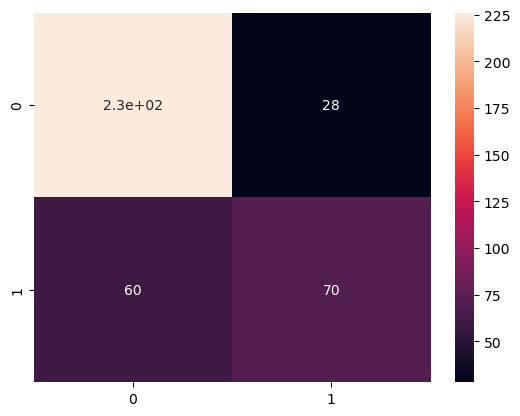

In [206]:
sns.heatmap(cm, annot=True)

# Try Predicting with new data

In [59]:
pred2 = knndiab.predict([[6,	148,	72,	35,	12,	33.6,	0.627,	50]])
pred2

array([1])

### Model predicted that the data given would be classified as Diabetic

# Get data from user at runtime

In [212]:
prg = int(input("Pregnancies : "))	
gl = float(input("Glucose : "))	
bp = float(input("BloodPressure : "))	
st = float(input("SkinThickness : "))	
ins = float(input("Insulin : "))	
bmi = float(input("BMI : "))	
dp = float(input("DiabetesPedigreeFunction : "))	
age = int(input("Age : "))

pred3 = knndiab.predict([[prg, gl, bp, st, ins, bmi, dp, age]])
pred3

Pregnancies :  1
Glucose :  0.4472
BloodPressure :  0.5410
SkinThickness :  0.2323
Insulin :  0.1111
BMI :  0.4180
DiabetesPedigreeFunction :  0.0380
Age :  0


array([0])

In [213]:
# MINMAX Scaled values for (1	89	66	23	94	28.1	0.167	21) is [[1, 0.4472, 0.5410, 0.2323, 0.1111, 0.4180, 0.0380, 0.0000]]

	
pred3 = knndiab.predict([[0.0588, 0.4472, 0.5410, 0.2323, 0.1111, 0.4180, 0.0380, 0.0000]])

pred3

array([0])